In [23]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import time
from openai import OpenAI
import os
import requests
import getpass
os.environ['OPENAI_API_KEY'] = getpass.getpass('OpenAI API Key:')

client = OpenAI()# api_key=os.environ.get("", "<your OpenAI API key if not set as env var>"))



KeyboardInterrupt: Interrupted by user

In [8]:
video = cv2.VideoCapture("IMG_6278.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

333 frames read.


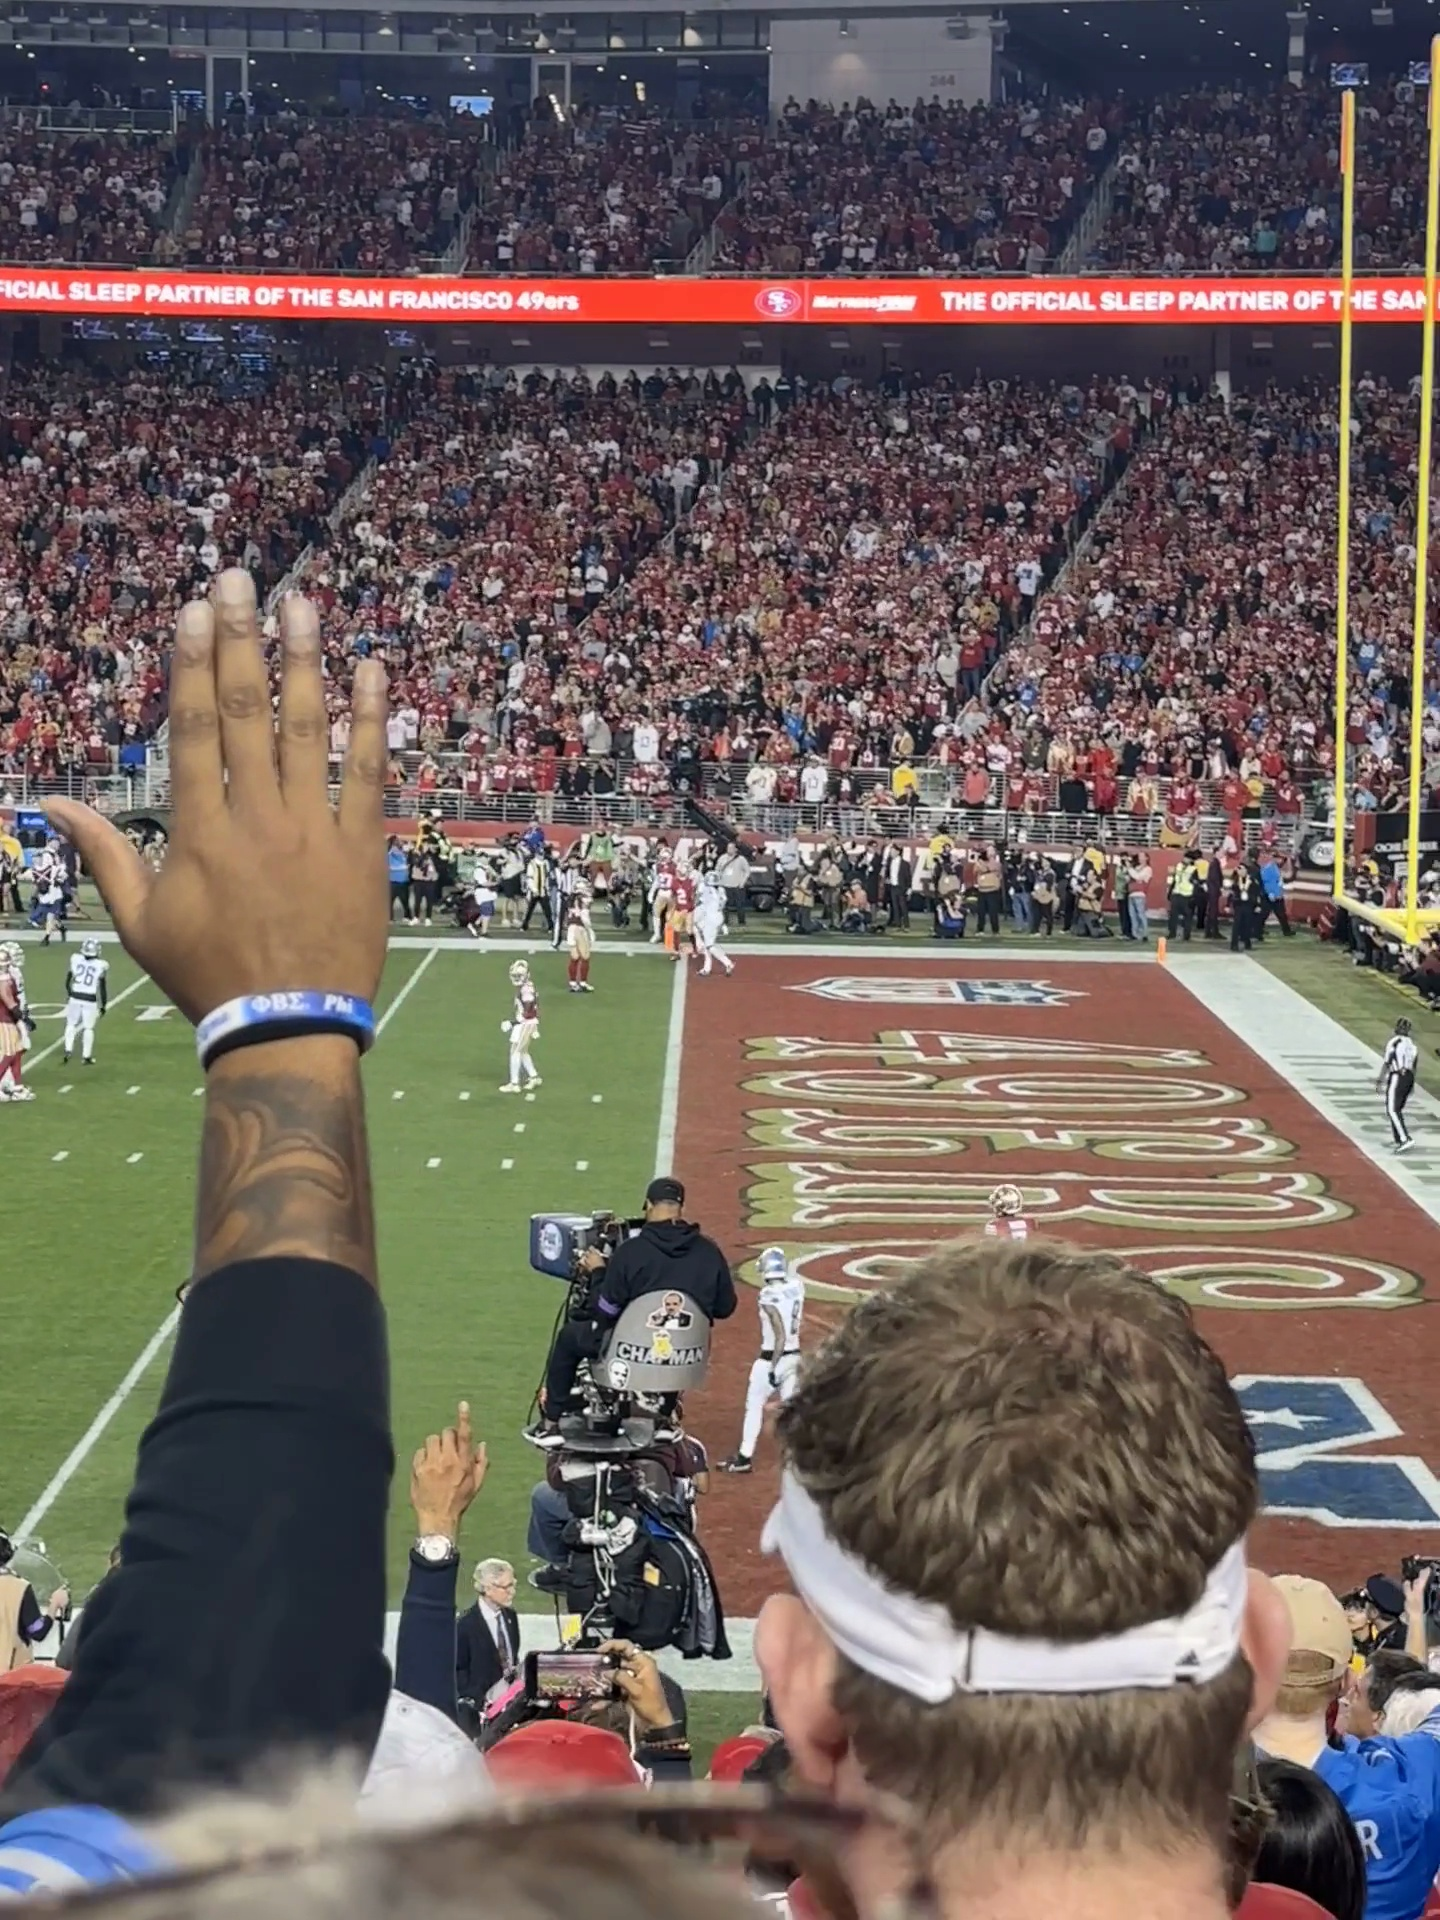

In [4]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [10]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are the images from a video. Explain what's going on?",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

These images show a sequence of events during an American football game. Here's the breakdown:

1. The first image depicts the offensive team (wearing light-colored uniforms) and the defensive team (wearing darker uniforms) lined up facing each other. This is right before the play starts, with the offensive team ready to snap the ball.

2. In the second image, the ball has been snapped to the quarterback, who is starting the play while the offensive line engages with the defensive line to protect the quarterback.

3. The third image shows the quarterback in the process of throwing the ball, with the offensive line still holding their blocks against the defense.

4. The fourth image captures the moment immediately after the quarterback has thrown a pass down the field. The ball is in the air and both teams are adjusting their positions in response to the pass.

5. The fifth image shows the ball approaching the intended receiver as he's running down the field, with defensive players atte

In [22]:
base64Frames[0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAeABaADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDvdI+EOsf8Ezf+CdV34tXRdvjvxB/x93m3Hkbx9WHRq/IvxX4i8U/Enx68N29xqWr63e52lzjn2zX17+29/wAFCv2kfHkt/wDs+/FLWo7rS1nL6dJKcSFQ33iFyO4r5R+D/i1PB/xk0nWRo/2xrS49P8+tB99gP3NFy7n6C/s

In [21]:
from langchain_community.llms import Ollama

bakllava = Ollama(model="llava")


llm_with_image_context = bakllava.bind(images=[base64Frames[0::100]])
llm_with_image_context.invoke("These are frames of a video. Create a short voiceover script in the style of David Attenborough. Only include the narration.")

ValueError: Ollama call failed with status code 400. Details: json: cannot unmarshal string into Go struct field GenerateRequest.images of type uint8

In [ ]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video. Create a short voiceover script in the style of David Attenborough. Only include the narration.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::25]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 500,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

In [ ]:
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}",
    },
    json={
        "model": "tts-1-1106",
        "input": result.choices[0].message.content,
        "voice": "onyx",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)

KeyboardInterrupt: 

In [18]:
input = """
In the grand theatre of human athleticism, a unique spectacle unfolds under the dazzling lights. Here, in the vast arena, the air thrums with the collective heartbeat of a thousand spectators, each breath a silent prayer to the heroes of the gridiron.

Behold the poised giants clad in battle armor, colors bold and bright, a testament to their allegiance. At the heart of this verdant expanse, they stand: poised, powerful, the embodiment of strategy and strength. Red giants on one side, blue titans on the other, a mere heartbeat away from the clash.

The ritual begins with a symphony of calls and signals, a secret language known only to these warriors. And then - the eruption of motion! A graceful ballet of brawn, as the ball, an object of singular focus, is snapped into the air, darting like a comet across a starlit field.

Watch as one, an orchestrator of this orchestrated chaos, cradles the projectile with the deftest of touches, launching it towards the heavens. His counterparts, sentinels of the scarlet hue, amass an impenetrable wall, a fortress of flesh and bone.

But look there! A fleet-footed envoy of the cerulean brigade breaks free, the pigskin it his sanctum, his prize. With each determined stride, he courts destiny, even as the red legion gives chase, a swarm of determination intent on reclaiming their pride.

The pursuit is relentless, a dance as old as time. With each pivot and turn, the anticipation swells, until at last... the final act unfolds in a flurry of motion too fast, too furious for the untrained eye. A culmination of skill, of will, where triumph and despair walk hand-in-hand.

This is the drama of American football, a testament to human spirit, played out on this hallowed turf, where every second is a lifetime, and every play etched into the annals of time.

"""

In [19]:
from openai import OpenAI

client = OpenAI()

response = client.audio.speech.create(
    model="tts-1",
    voice="alloy",
    input=input,
)

response.stream_to_file("output.mp3")

/var/folders/z6/pr25n7fs0zd2jg6qxjvfhsv80000gn/T/ipykernel_23991/1994027485.py:11: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("output.mp3")


In [17]:
response.stream_to_file("output.mp3")

AttributeError: 'Response' object has no attribute 'stream_to_file'